# Expected vs. Sample Updates

In practice, the computation required by update operations is usually dominated by the number of state–action pairs at which $Q$ is evaluated.
- For a particular starting pair, $(s,a)$, let $b$ be the branching factor (i.e., the number of possible next states, $s'$, for which $pˆ(s' | s,a) > 0$).
- Then an expected update of this pair requires roughly $b$ times as much computation as a sample update.

- If there is:
  1. enough time to complete an expected update, then the resulting estimate is generally better than that of $b$ sample updates because of the absence of sampling error,
  2. insufficient time to complete an expected update, then sample updates are always preferable because they at least make some improvement in the value estimate with fewer than $b$ updates.
- In a large problem with many state–action pairs, we are often in the 2nd situation.
  - With so many state–action pairs, expected updates of all of them would take a very long time.
  - Before that we may be much better off with a few sample updates at many state–action pairs than with expected updates at a few pairs.
  - Given a unit of computational effort, is it better devoted to a few expected updates or to $b$ times as many sample updates?
- Figure 8.7 shows the results of an analysis that suggests an answer to this question.

In [1]:
from IPython.display import Image

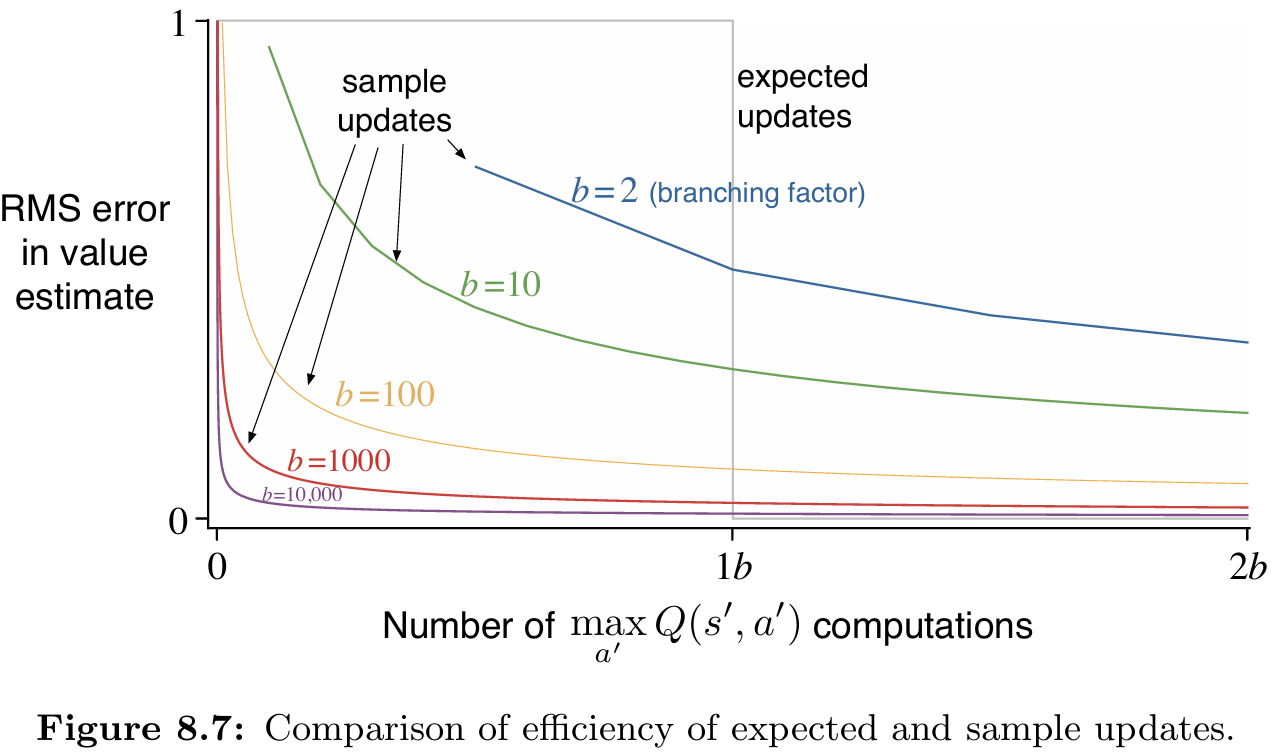

In [2]:
Image(filename="../book_images/Figure_8_7.PNG")

It shows the estimation error as a function of computation time for expected and sample updates for a variety of branching factors, $b$.
- The case considered is that in which all $b$ successor states are equally likely and in which the error in the initial estimate is 1.
- The values at the next states are assumed correct, so the expected update reduces the error to 0 upon its completion.
- In this case, sample updates reduce the error according to $\sqrt{\frac{b-1}{bt}}$ where $t$ is the number of sample updates that have been performed (assuming sample averages, i.e., $\alpha=\frac{1}{t}$).
- The key observation is that for moderately large $b$ the error falls dramatically with a tiny fraction of $b$ updates.
- For these cases, many state–action pairs could have their values improved dramatically, to within a few percent of the effect of an expected update, in the same time that a single state–action pair could undergo an expected update.


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

matplotlib.use('Agg')

In [ ]:
from src.expectation_vs_sample import calculate_errors

In [ ]:
# Number of runs
runs = 100

# List of branching factors
branching_factors = [2, 10, 100, 1000]

In [ ]:
# For every branching factor in the list of branching factors
for branching_factor in branching_factors:
    
    # create a matrix for errors filled with 0s
    errors = np.zeros((runs, 2 * branching_factor))
    
    # for every run
    for run in tqdm(np.arange(runs)):
        # get the RMS error in value estimate
        errors[run] = calculate_errors(branching_factor)
    
    # average the errors
    errors = errors.mean(axis=0)
    
    # form the OX axis
    x_axis = (np.arange(len(errors)) + 1) / float(branching_factor)
    
    # plotting
    plt.plot(x_axis, errors, label=f"b = {branching_factor}")

In [ ]:
plt.xlabel("Number of computations")
plt.xticks([0, 1.0, 2.0], ['0', 'b', '2b'])
plt.ylabel("RMS error in value estimate")
plt.legend()

In [ ]:
plt.savefig("../generated_images/figure_8_7.png")
plt.close()